# US Financial Distress Prediction: Data Wrangling

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
# Data was obtained from https://simfin.com/
usInc = pd.read_csv("us-income-annual.csv", delimiter=";")
usBal = pd.read_csv("us-balance-annual.csv", delimiter=";")
usCash = pd.read_csv("us-cashflow-annual.csv", delimiter=";")
econ = pd.read_csv("economicvariables.csv")

In [4]:
econ = econ.rename(columns=lambda col: col.split()[0])
econ

,Series,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Consumer price index (2010 = 100),74.755433,76.391102,78.970721,81.202568,82.490467,84.363079,86.621678,89.560532,92.449705,...,100.000000,103.156842,105.291505,106.833849,108.566932,108.695722,110.067009,112.411557,115.157303,117.244196
1,Real interest rate (%),7.148192,6.457135,6.844844,4.626757,3.045071,2.224101,1.604589,2.981357,4.786448,...,2.060737,1.137338,1.307083,1.469299,1.374742,2.195671,2.451023,2.172063,2.409470,3.276919


In [5]:
balCash = pd.merge(usBal, usCash, on=["Ticker", "SimFinId", "Currency", 'Fiscal Year'])
balCash.head()

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period_x,Report Date_x,Publish Date_x,Restated Date_x,Shares (Basic)_x,Shares (Diluted)_x,...,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash
0,A,45846,USD,2008,Q4,2008-10-31,2008-12-19,2009-12-21,363000000.0,371000000.0,...,756000000,-140000000.0,150000000.0,-1.720000e+08,-3.850000e+08,NaN,1.600000e+07,-790000000.0,-7.880000e+08,-421000000
1,A,45846,USD,2009,Q4,2009-10-31,2009-12-21,2010-12-20,346000000.0,346000000.0,...,408000000,-127000000.0,94000000.0,4.300000e+07,-4.000000e+06,NaN,7.480000e+08,-86000000.0,6.470000e+08,1074000000
2,A,45846,USD,2010,Q4,2010-10-31,2010-12-20,2011-12-16,347000000.0,353000000.0,...,718000000,-114000000.0,38000000.0,-1.108000e+09,-1.174000e+09,0.0,7.180000e+08,-112000000.0,6.010000e+08,170000000
3,A,45846,USD,2011,Q4,2011-10-31,2011-12-16,2012-12-20,347000000.0,355000000.0,...,1260000000,-170000000.0,16000000.0,-9.700000e+07,1.294000e+09,0.0,-1.500000e+09,-193000000.0,-1.693000e+09,878000000
4,A,45846,USD,2012,Q4,2012-10-31,2012-12-20,2013-12-19,348000000.0,353000000.0,...,1228000000,-194000000.0,5000000.0,-2.257000e+09,-2.366000e+09,-104000000.0,1.500000e+08,-72000000.0,-3.500000e+07,-1174000000


In [6]:
balCash.columns

Index(['Ticker', 'SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period_x',
       'Report Date_x', 'Publish Date_x', 'Restated Date_x',
       'Shares (Basic)_x', 'Shares (Diluted)_x',
       'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Long Term Investments & Receivables', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Short Term Debt', 'Total Current Liabilities', 'Long Term Debt',
       'Total Noncurrent Liabilities', 'Total Liabilities',
       'Share Capital & Additional Paid-In Capital', 'Treasury Stock',
       'Retained Earnings', 'Total Equity', 'Total Liabilities & Equity',
       'Fiscal Period_y', 'Report Date_y', 'Publish Date_y', 'Restated Date_y',
       'Shares (Basic)_y', 'Shares (Diluted)_y', 'Net Income/Starting Line',
       'Depreciation & Amortization', 'Non-Cash Items',
 

In [7]:
balCash.drop(labels=['Fiscal Period_x', 'Report Date_x', 'Publish Date_x', 'Restated Date_x', 'Shares (Basic)_y', 'Shares (Diluted)_y', 'Fiscal Period_y', 'Report Date_y', 'Publish Date_y', 'Restated Date_y'], inplace=True, axis=1)
balCash

,Ticker,SimFinId,Currency,Fiscal Year,Shares (Basic)_x,Shares (Diluted)_x,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,...,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash
0,A,45846,USD,2008,363000000.0,371000000.0,1.429000e+09,770000000.0,6.460000e+08,3.182000e+09,...,756000000,-140000000.0,150000000.0,-1.720000e+08,-3.850000e+08,NaN,1.600000e+07,-790000000.0,-7.880000e+08,-421000000
1,A,45846,USD,2009,346000000.0,346000000.0,2.493000e+09,595000000.0,5.520000e+08,3.961000e+09,...,408000000,-127000000.0,94000000.0,4.300000e+07,-4.000000e+06,NaN,7.480000e+08,-86000000.0,6.470000e+08,1074000000
2,A,45846,USD,2010,347000000.0,353000000.0,2.649000e+09,869000000.0,7.160000e+08,6.169000e+09,...,718000000,-114000000.0,38000000.0,-1.108000e+09,-1.174000e+09,0.0,7.180000e+08,-112000000.0,6.010000e+08,170000000
3,A,45846,USD,2011,347000000.0,355000000.0,3.527000e+09,860000000.0,8.980000e+08,5.569000e+09,...,1260000000,-170000000.0,16000000.0,-9.700000e+07,1.294000e+09,0.0,-1.500000e+09,-193000000.0,-1.693000e+09,878000000
4,A,45846,USD,2012,348000000.0,353000000.0,2.351000e+09,923000000.0,1.014000e+09,4.629000e+09,...,1228000000,-194000000.0,5000000.0,-2.257000e+09,-2.366000e+09,-104000000.0,1.500000e+08,-72000000.0,-3.500000e+07,-1174000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19759,ZYXI,171401,USD,2015,31271234.0,31271234.0,8.000000e+03,2426000.0,3.050000e+05,2.766000e+06,...,341000,NaN,NaN,NaN,1.080000e+05,NaN,-5.040000e+05,NaN,-5.040000e+05,-55000
19760,ZYXI,171401,USD,2016,31271234.0,31271234.0,2.470000e+05,3028000.0,1.070000e+05,3.422000e+06,...,1769000,NaN,NaN,NaN,-2.260000e+05,NaN,-1.304000e+06,0.0,-1.304000e+06,239000
19761,ZYXI,171401,USD,2017,32156000.0,33196000.0,5.565000e+06,2185000.0,4.230000e+05,8.371000e+06,...,8260000,NaN,NaN,NaN,-8.700000e+04,NaN,-2.517000e+06,-183000.0,-2.855000e+06,5318000
19762,ZYXI,171401,USD,2018,32503000.0,34043000.0,1.012800e+07,2791000.0,8.370000e+05,1.432400e+07,...,9408000,NaN,NaN,NaN,-1.082000e+06,NaN,-5.070000e+05,-3256000.0,-3.763000e+06,4563000


In [8]:
df = pd.merge(usInc, balCash, on=['Ticker', 'SimFinId', 'Currency', 'Fiscal Year'])
df

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash
0,A,45846,USD,2008,FY,2008-10-31,2008-12-19,2010-12-20,363000000.0,371000000.0,...,756000000,-140000000.0,150000000.0,-1.720000e+08,-3.850000e+08,NaN,1.600000e+07,-790000000.0,-7.880000e+08,-421000000
1,A,45846,USD,2009,FY,2009-10-31,2009-12-21,2011-12-16,346000000.0,346000000.0,...,408000000,-127000000.0,94000000.0,4.300000e+07,-4.000000e+06,NaN,7.480000e+08,-86000000.0,6.470000e+08,1074000000
2,A,45846,USD,2010,FY,2010-10-31,2010-12-20,2012-12-20,347000000.0,353000000.0,...,718000000,-114000000.0,38000000.0,-1.108000e+09,-1.174000e+09,0.0,7.180000e+08,-112000000.0,6.010000e+08,170000000
3,A,45846,USD,2011,FY,2011-10-31,2011-12-16,2013-12-19,347000000.0,355000000.0,...,1260000000,-170000000.0,16000000.0,-9.700000e+07,1.294000e+09,0.0,-1.500000e+09,-193000000.0,-1.693000e+09,878000000
4,A,45846,USD,2012,FY,2012-10-31,2012-12-20,2014-12-22,348000000.0,353000000.0,...,1228000000,-194000000.0,5000000.0,-2.257000e+09,-2.366000e+09,-104000000.0,1.500000e+08,-72000000.0,-3.500000e+07,-1174000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19680,ZYXI,171401,USD,2015,FY,2015-12-31,2016-03-31,2017-04-17,31271234.0,31271234.0,...,341000,NaN,NaN,NaN,1.080000e+05,NaN,-5.040000e+05,NaN,-5.040000e+05,-55000
19681,ZYXI,171401,USD,2016,FY,2016-12-31,2017-04-18,2018-02-28,31271234.0,31271234.0,...,1769000,NaN,NaN,NaN,-2.260000e+05,NaN,-1.304000e+06,0.0,-1.304000e+06,239000
19682,ZYXI,171401,USD,2017,FY,2017-12-31,2018-02-28,2018-02-28,32156000.0,33196000.0,...,8260000,NaN,NaN,NaN,-8.700000e+04,NaN,-2.517000e+06,-183000.0,-2.855000e+06,5318000
19683,ZYXI,171401,USD,2018,FY,2018-12-31,2019-02-26,2019-02-26,32503000.0,34043000.0,...,9408000,NaN,NaN,NaN,-1.082000e+06,NaN,-5.070000e+05,-3256000.0,-3.763000e+06,4563000


In [9]:
# Replacing 0 with 1 to avoid inf values.
df = df.replace(to_replace=0, value=1)

In [10]:
df.columns

Index(['Ticker', 'SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period',
       'Report Date', 'Publish Date', 'Restated Date', 'Shares (Basic)',
       'Shares (Diluted)', 'Revenue', 'Cost of Revenue', 'Gross Profit',
       'Operating Expenses', 'Selling, General & Administrative',
       'Research & Development', 'Depreciation & Amortization_x',
       'Operating Income (Loss)', 'Non-Operating Income (Loss)',
       'Interest Expense, Net', 'Pretax Income (Loss), Adj.',
       'Abnormal Gains (Losses)', 'Pretax Income (Loss)',
       'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income', 'Net Income (Common)',
       'Shares (Basic)_x', 'Shares (Diluted)_x',
       'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Long Term Investments & Receivables', 'Other Long Term

In [41]:
assetTurn = []
for i in range(1, len(df.index)):
    begAssets = df['Total Assets'][i-1] if df['Ticker'][i-1] == df['Ticker'][i] else np.nan
    endAssets = df['Total Assets'][i]
    assetTurn_i = df['Revenue'][i] / ((begAssets + endAssets) / 2)
    assetTurn.append(assetTurn_i)
assetTurn.insert(0, np.nan)

In [42]:
len(assetTurn)

19685

In [51]:
# Multiple negative expense accounts by -1.
df['Operating Expenses'] = df['Operating Expenses'] * -1
df['Interest Expense, Net'] = df['Interest Expense, Net'] * -1

df['Interest Expense, Net'].fillna(value=1, inplace=True)
df['Depreciation & Amortization_x'].fillna(value=1, inplace=True)
df['Net Cash from Operating Activities'].fillna(1, inplace=True)
df['Inventories'].fillna(1, inplace=True)
df['Dividends Paid'].fillna(1, inplace=True)
df['Long Term Debt'].fillna(1, inplace=True)

# Profitability
profitMgn = df['Net Income'] / df['Revenue']
grossMgn = df['Gross Profit'] / df['Revenue']
opMgn = (df['Gross Profit'] - df['Operating Expenses']) / df['Revenue']
ebitda = df['Net Income'] + df['Interest Expense, Net'] + df['Depreciation & Amortization_x']
ebitdaMgn = ebitda / df['Revenue']
roe = df['Net Income'] / df['Total Equity']
roa = df['Net Income'] / df['Total Assets']
roc = (df['Net Income'] - df['Dividends Paid']) / df['Total Liabilities & Equity']

# Solvency
current = df['Total Current Assets'] / df['Total Current Liabilities']
quickAssets = df['Total Current Assets'] - df['Inventories']
quick = quickAssets / df['Total Current Liabilities'] 
tfotl = df['Net Cash from Operating Activities'] / df['Total Liabilities'] 
tlta = df['Total Liabilities'] / df['Total Assets'] 
noCreditInt = (quickAssets - df['Total Current Liabilities']) / (df['Operating Expenses'] / 365) 
intCover = ebitda / (df['Interest Expense, Net'])

# Operational efficiency
assetTurn = []
for i in range(1, len(df.index)):
    begAssets = df['Total Assets'][i-1] if df['Ticker'][i-1] == df['Ticker'][i] else np.nan
    endAssets = df['Total Assets'][i]
    assetTurn_i = df['Revenue'][i] / ((begAssets + endAssets) / 2)
    assetTurn.append(assetTurn_i)
assetTurn.insert(0, np.nan)

# Piotroski score
piotroski = []
for i in range(1, len(df.index)):
    pio_i = 0
    
    # Profitability criteria
    income_i = df['Net Income'][i]
    roa_i = roa[i]
    cfo_i = df['Net Cash from Operating Activities'][i]
    
    # Leverage, liquidity, and source of funds criteria
    ltd_iminus1 = df['Long Term Debt'][i-1] if df['Ticker'][i-1] == df['Ticker'][i] else np.nan
    ltd_i = df['Long Term Debt'][i]
    curr_iminus1 = current[i-1] if df['Ticker'][i-1] == df['Ticker'][i] else np.nan
    curr_i = current[i]
    dilutedShares_iminus1 = df['Shares (Diluted)'][i-1] if df['Ticker'][i-1] == df['Ticker'][i] else np.nan
    dilutedShares_i = df['Shares (Diluted)'][i]
    
    # Operating efficieny criteria
    gm_iminus1 = grossMgn[i-1] if df['Ticker'][i-1] == df['Ticker'][i] else np.nan
    gm_i = grossMgn[i]
    assetTurn_iminus1 = assetTurn[i-1] if df['Ticker'][i-1] == df['Ticker'][i] else np.nan
    assetTurn_i = assetTurn[i]
    
    if income_i > 0:
        pio_i += 1
    if roa_i > 0:
        pio_i += 1
    if cfo_i > 0:
        pio_i += 1
    if cfo_i > income_i:
        pio_i += 1
    if np.isnan(ltd_iminus1) == False:
        if ltd_i < ltd_iminus1:
            pio_i += 1
    if np.isnan(curr_iminus1) == False:
        if curr_i > curr_iminus1:
            pio_i += 1
    if np.isnan(dilutedShares_i) == False:
        if dilutedShares_i <= dilutedShares_iminus1:
            pio_i += 1
    if np.isnan(gm_iminus1) == False:
        if gm_i > gm_iminus1:
            pio_i += 1
    if np.isnan(assetTurn_iminus1) == False:
        if assetTurn_i > assetTurn_iminus1:
            pio_i += 1
        
    piotroski.append(pio_i)
piotroski.insert(0, np.nan)   

# Macroeconomic
cpi = []
realRate = []
for i in range(len(df['Fiscal Year'])):
    cpi.append(econ[str(df['Fiscal Year'][i])].iloc[0])
    realRate.append(econ[str(df['Fiscal Year'][i])].iloc[1])

# Distress indicator.
distress = []
for i in range(len(intCover) - 1):
    if ((ebitda[i+1] < df['Interest Expense, Net'][i+1]) & (df['Ticker'][i] == df['Ticker'][i+1])):
        distress.append(1)
    else:
        distress.append(0)
distress.append(0)

In [45]:
numPos = sum(distress)
total = len(distress)
print('Prevalence: ', numPos / total)
print(total)

Prevalence:  0.33888747777495554
19685


In [53]:
dataDict = {'profitMgn': profitMgn, 'grossMgn': grossMgn, 'opMgn': opMgn, 'ebitdaMgn': ebitdaMgn, 'roe': roe, 'roa': roa, 'roc': roc, 'current': current, 'quick': quick, 'tfotl': tfotl, 'tlta': tlta, 'noCreditInt': noCreditInt, 'intCover': intCover,
            'piotroski': piotroski, 'cpi': cpi, 'realRate': realRate, 'distress': distress}
data1 = pd.DataFrame(dataDict)

In [56]:
data1.head()

,profitMgn,grossMgn,opMgn,ebitdaMgn,roe,roa,roc,current,quick,tfotl,tlta,noCreditInt,intCover,piotroski,cpi,realRate,distress
0,0.120021,0.553516,0.969345,0.118289,0.270809,0.098901,0.098901,2.392481,1.906767,0.169964,0.634794,-183.336110,-68.300000,NaN,98.737477,3.082411,1
1,-0.006918,0.511493,1.012497,-0.020085,-0.012331,-0.004073,-0.004073,3.527159,3.035619,0.080031,0.669732,-371.665924,1.525424,4.0,98.386420,2.468829,0
2,0.125643,0.538207,0.972447,0.111683,0.211372,0.070545,0.070545,2.000973,1.768732,0.111146,0.666254,-365.926396,-8.000000,7.0,100.000000,2.060737,0
3,0.152986,0.533485,0.905064,0.142101,0.234476,0.111737,0.111737,3.031573,2.542733,0.265767,0.523463,-420.834011,-13.055556,7.0,103.156842,1.137338,0
4,0.168125,0.525518,0.887868,0.154710,0.222372,0.109434,0.119305,2.445325,1.909667,0.229490,0.507878,-252.929577,-11.532609,5.0,105.291505,1.307083,0


In [59]:
data1.isna().sum()

profitMgn      275
grossMgn       275
opMgn          339
ebitdaMgn      275
roe              1
roa              0
roc              0
current          4
quick            4
tfotl            0
tlta             0
noCreditInt     69
intCover         0
piotroski        1
cpi              0
realRate         0
distress         0
dtype: int64

<AxesSubplot:>

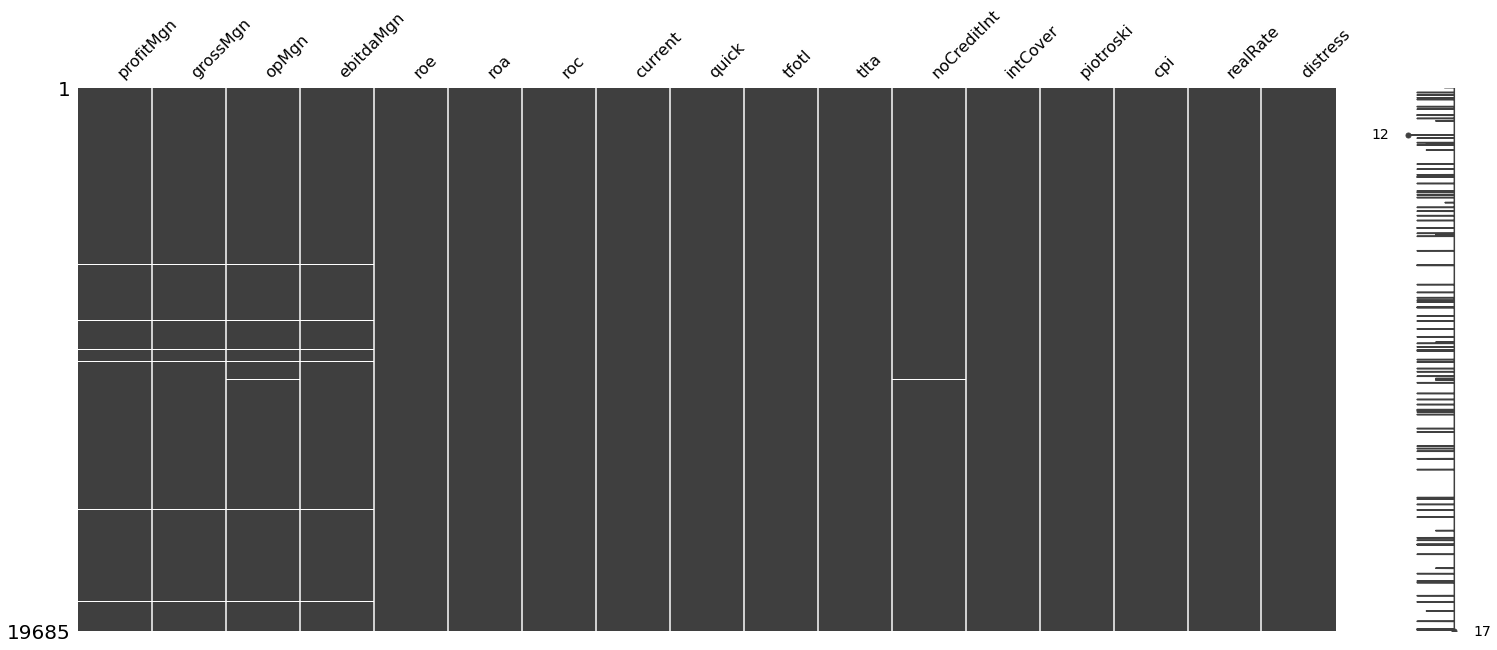

In [62]:
msno.matrix(data1)

array([[<AxesSubplot:title={'center':'profitMgn'}>,
        <AxesSubplot:title={'center':'grossMgn'}>,
        <AxesSubplot:title={'center':'opMgn'}>,
        <AxesSubplot:title={'center':'ebitdaMgn'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'roa'}>,
        <AxesSubplot:title={'center':'roc'}>,
        <AxesSubplot:title={'center':'current'}>],
       [<AxesSubplot:title={'center':'quick'}>,
        <AxesSubplot:title={'center':'tfotl'}>,
        <AxesSubplot:title={'center':'tlta'}>,
        <AxesSubplot:title={'center':'noCreditInt'}>],
       [<AxesSubplot:title={'center':'intCover'}>,
        <AxesSubplot:title={'center':'cpi'}>,
        <AxesSubplot:title={'center':'realRate'}>,
        <AxesSubplot:title={'center':'distress'}>]], dtype=object)

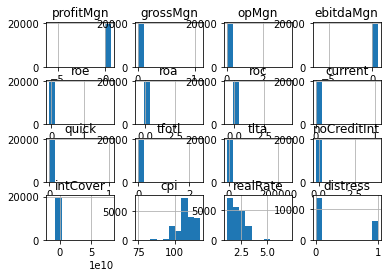

In [22]:
data1.hist()

In [72]:
# Mapping each feature to (-1, 1) with f(x) = tanh(x) to deal with outliers as suggested in Tinoco & Wilson (2013). 
data2 = data1.iloc[:, :13].apply(func=lambda col: np.tanh(col), axis=1)
data2['piotroski'] = data1['piotroski']
data2['cpi'] = data1['cpi']
data2['realRate'] = data1['realRate']
data2['distress'] = data1['distress']

array([[<AxesSubplot:title={'center':'profitMgn'}>,
        <AxesSubplot:title={'center':'grossMgn'}>,
        <AxesSubplot:title={'center':'opMgn'}>,
        <AxesSubplot:title={'center':'ebitdaMgn'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'roa'}>,
        <AxesSubplot:title={'center':'roc'}>,
        <AxesSubplot:title={'center':'current'}>],
       [<AxesSubplot:title={'center':'quick'}>,
        <AxesSubplot:title={'center':'tfotl'}>,
        <AxesSubplot:title={'center':'tlta'}>,
        <AxesSubplot:title={'center':'noCreditInt'}>],
       [<AxesSubplot:title={'center':'intCover'}>,
        <AxesSubplot:title={'center':'piotroski'}>,
        <AxesSubplot:title={'center':'cpi'}>,
        <AxesSubplot:title={'center':'realRate'}>],
       [<AxesSubplot:title={'center':'distress'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

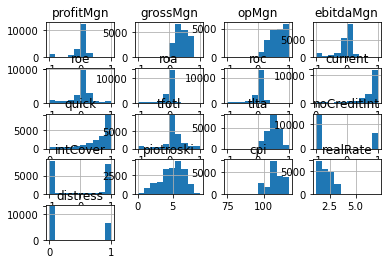

In [73]:
data2.hist()

The distributions are much more reasonable now that outliers have been dealt with.

<AxesSubplot:>

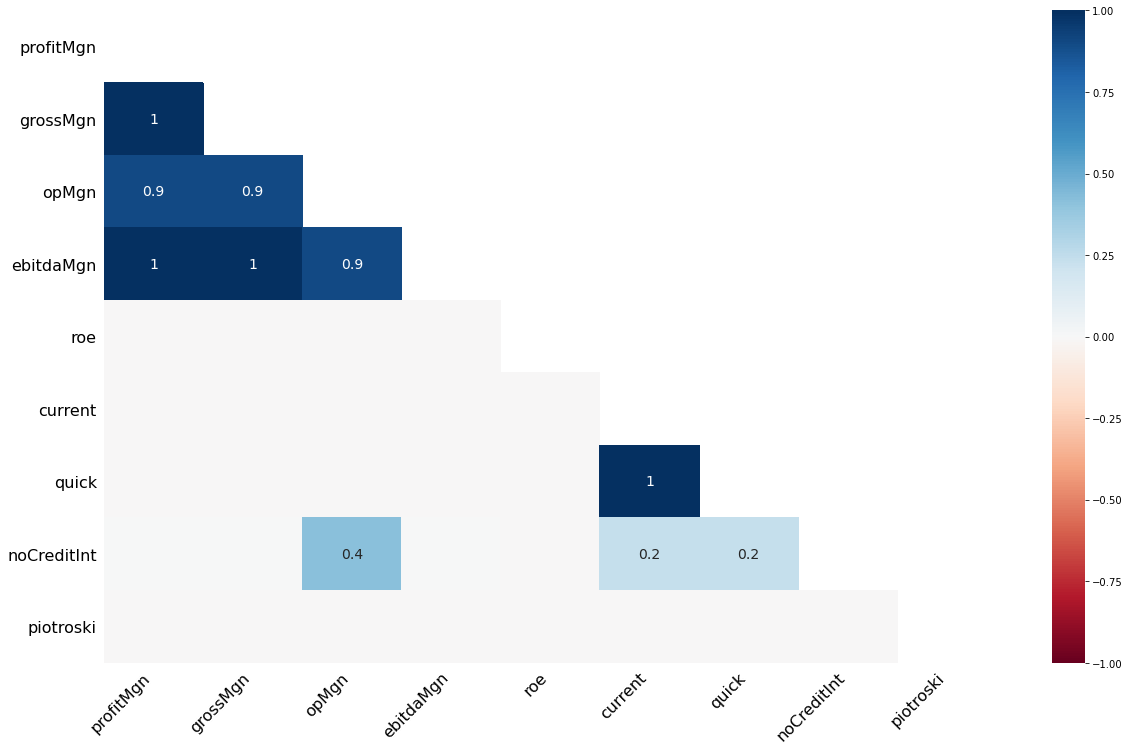

In [74]:
msno.heatmap(data2)

In [79]:
data3 = data2.interpolate(method='linear', axis=0)

In [80]:
data3.isna().sum()

profitMgn      0
grossMgn       0
opMgn          0
ebitdaMgn      0
roe            0
roa            0
roc            0
current        0
quick          0
tfotl          0
tlta           0
noCreditInt    0
intCover       0
piotroski      1
cpi            0
realRate       0
distress       0
dtype: int64

In [98]:
distressedPiotroskis = data3['piotroski'][data3['distress']==1]
data3['piotroski'] = data3['piotroski'].fillna(np.floor(np.mean(distressedPiotroskis)))

In [99]:
data3.head()

,profitMgn,grossMgn,opMgn,ebitdaMgn,roe,roa,roc,current,quick,tfotl,tlta,noCreditInt,intCover,piotroski,cpi,realRate,distress
0,0.119448,0.503151,0.748416,0.117740,0.264377,0.098580,0.098580,0.983430,0.956813,0.168346,0.561344,-1.0,-1.000000,5.0,98.737477,3.082411,1
1,-0.006918,0.471108,0.766793,-0.020082,-0.012330,-0.004072,-0.004072,0.998274,0.995394,0.079861,0.584804,-1.0,0.909638,4.0,98.386420,2.468829,0
2,0.124986,0.491630,0.749778,0.111221,0.208279,0.070428,0.070428,0.964096,0.943470,0.110690,0.582510,-1.0,-1.000000,7.0,100.000000,2.060737,0
3,0.151803,0.488040,0.718755,0.141152,0.230272,0.111274,0.111274,0.995357,0.987704,0.259681,0.480368,-1.0,-1.000000,7.0,103.156842,1.137338,0
4,0.166558,0.481947,0.710339,0.153487,0.218778,0.109000,0.118742,0.985079,0.957057,0.225544,0.468290,-1.0,-1.000000,5.0,105.291505,1.307083,0


In [101]:
data3.to_csv('distressdata.csv', index=False)